# SOFTMAX CLASSIFIER FROM SCRATCH
### Categorical crossentropy as loss function and Gradient descent as optimizer

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
def read_asc_data(filename):    
    f= open(filename,'r') 
    tmp_str=f.readline()
    tmp_arr=tmp_str[:-1].split(' ')
    N=int(tmp_arr[0]);n_row=int(tmp_arr[1]);n_col=int(tmp_arr[2])
    print("N=%d, row=%d, col=%d" %(N,n_row,n_col))
    data=np.zeros([N,n_row*n_col+1])
    for n in range(N):
        tmp_str=f.readline()
        tmp_arr=tmp_str[:-1].split(' ')       
        for i in range(n_row*n_col+1):
            data[n][i]=int(tmp_arr[i])
    f.close() 
    return N,n_row,n_col,data

In [2]:
iris = datasets.load_iris()
X = iris.data[:,[0,3]]
y = iris.target

In [3]:
X.shape

(150, 2)

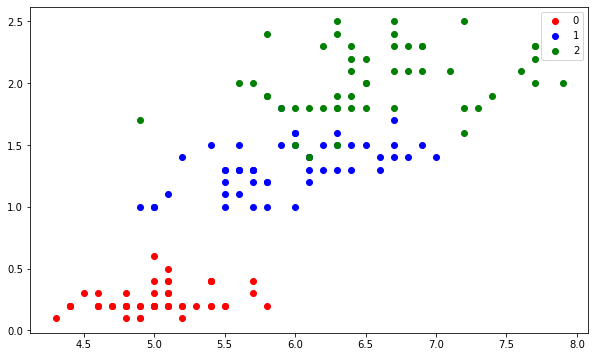

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X[y==0][:,0],X[y==0][:,1], color='red', label='0')
plt.scatter(X[y==1][:,0],X[y==1][:,1], color='blue', label='1')
plt.scatter(X[y==2][:,0],X[y==2][:,1], color='green', label='2')
plt.legend(loc='best')
plt.show()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=24)

In [6]:
# baseline
from sklearn.linear_model import LogisticRegression
mcl = LogisticRegression(multi_class='multinomial')
mcl.fit(X,y)
mcl.score(x_test, y_test)

0.96

In [27]:
class SoftmaxClassifier():
    def __init__(self, lr, epochs, verbose=False):
        self.lr = lr
        self.epochs = epochs
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0],1))
        return np.concatenate((intercept, X),axis=1)
    
    def __calc_probs(self, X):
        #print(f'X Shape: {X.shape} | W Shape: {(self.w).shape}')
        z  = np.dot(X,self.w)
        probs = np.array([np.exp(x)/np.sum(np.exp(x)) for x in z])
        return probs
        
    def __loss(self, y, probs):
        return (-np.sum(y * np.log(probs)))
    
    def fit(self, X, y):
        X = self.__add_intercept(X)
        ye = to_categorical(y)
        self.w = np.random.rand(X.shape[1],len(set(y)))
        loss_arr = []
        #print(f'X shape: {X.shape} | W shape: {w.shape}')
        
        for i in range(1,self.epochs+1):
            # Cálculo probabilidades
            probs = self.__calc_probs(X)
            
            # Cálculo Loss - categorical_crossentropy
            loss = self.__loss(ye, probs)
            
            loss_arr.append(loss)
            
            # Cálculo gradiente
            #grad = -(np.dot(X.T,(ye - probs)))/X.shape[0]
            grad = (np.dot(X.T,(probs - ye)))/X.shape[0]
            
            #grad = (np.dot((y-np.argmax(probs,axis=1)),X))/X.shape[0]
            #grad = (np.dot(np.sum(ye-probs,axis=1),X))/X.shape[0] # Está mal calculado
           
            #print(self.w[:2])
            self.w -= self.lr*grad
            #print(self.w[:2])
            
            if self.verbose == True and i % (self.epochs/10) == 0 and i != 0:
                print(f'Epoch: {i} | Loss: {loss}')
        
        return loss_arr
    #def predict(self, X):
    #    if self.fit_intercept:
    #        X = self.__add_intercept(X)
            
    #    return self.__sigmoid(np.dot(X, self.theta))
    
    def predict_probs(self, X):
        return self.__calc_probs(self.__add_intercept(X))

In [28]:
sc = SoftmaxClassifier(lr=0.1, epochs=10000, verbose=True)

In [29]:
loss = sc.fit(x_train, y_train)

Epoch: 1000 | Loss: 21.692951268618216
Epoch: 2000 | Loss: 17.15492952093298
Epoch: 3000 | Loss: 15.10784918621272
Epoch: 4000 | Loss: 13.881870046353143
Epoch: 5000 | Loss: 13.043077249681744
Epoch: 6000 | Loss: 12.424482750711768
Epoch: 7000 | Loss: 11.946044244194159
Epoch: 8000 | Loss: 11.56359981474979
Epoch: 9000 | Loss: 11.250333019541017
Epoch: 10000 | Loss: 10.988812325708032


In [30]:
preds = sc.predict_probs(x_test)

In [31]:
(np.argmax(preds,axis=1) == y_test).mean()

0.96

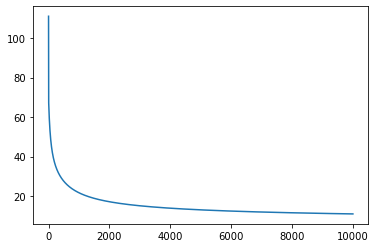

In [32]:
plt.plot(loss)

In [43]:
N,n_row,n_col,data=read_asc_data('line600.txt')
x_train, x_test, y_train, y_test = train_test_split(data[:,:-1], data[:,-1], test_size=0.5, random_state=24)

N=600, row=8, col=8


In [59]:
sc600 = SoftmaxClassifier(0.05, 10000, verbose=True)

In [60]:
sc600.fit(x_train,y_train)

Epoch: 1000 | Loss: 191.92812652525961
Epoch: 2000 | Loss: 189.75324535610648
Epoch: 3000 | Loss: 188.82754651604046
Epoch: 4000 | Loss: 188.28624608874412
Epoch: 5000 | Loss: 187.9208250994671
Epoch: 6000 | Loss: 187.6495208536382
Epoch: 7000 | Loss: 187.4342343800536
Epoch: 8000 | Loss: 187.25520268633886
Epoch: 9000 | Loss: 187.10131388906098
Epoch: 10000 | Loss: 186.96588643080958


In [53]:
predictions = sc600.predict_probs(x_test)

In [54]:
(np.argmax(predictions,axis=1) == y_test).mean()

0.74

In [61]:
N,n_row,n_col,data=read_asc_data('./rectangle600.txt')
x_train, x_test, y_train, y_test = train_test_split(data[:,:-1], data[:,-1], test_size=0.5, random_state=24)

N=600, row=8, col=8


In [71]:
sc600r = SoftmaxClassifier(0.5, 100000, verbose=True)

In [72]:
loss = sc600r.fit(x_train, y_train)

Epoch: 10000 | Loss: 154.13459258720673
Epoch: 20000 | Loss: 153.4214408191533
Epoch: 30000 | Loss: 153.36223579790862
Epoch: 40000 | Loss: 153.3528892928694
Epoch: 50000 | Loss: 153.34952096911485
Epoch: 60000 | Loss: 153.34746701403884
Epoch: 70000 | Loss: 153.34597302569057
Epoch: 80000 | Loss: 153.34481876568321
Epoch: 90000 | Loss: 153.34389821928607
Epoch: 100000 | Loss: 153.34314718858698


In [87]:
predsr = sc600r.predict_probs(x_train)

In [88]:
(np.argmax(predsr, axis=1) == y_train).mean()

0.73

In [89]:
def confusion_matrix(yr,yp):
    matrix = np.zeros((2,2))
    for yr, yp in zip(yr, yp):
        if yr == True:
            if yp == True:
                matrix[0,0] += 1
            else:
                matrix[1,0] += 1
        else:
            if yp == True:
                matrix[0,1] += 1
            else:
                matrix[1,1] += 1
    print(matrix)
    print(f'Recall: {matrix[0,0]/(matrix[0,0]+matrix[1,0])}\nAccuracy: {(matrix[0,0]+matrix[1,1])/np.sum(matrix)}\nPrecision: {matrix[0,0]/(matrix[0,0]+matrix[0,1])}')
            

In [91]:
confusion_matrix(y_train, np.argmax(predsr,axis=1))

[[ 95.  49.]
 [ 32. 124.]]
Recall: 0.7480314960629921
Accuracy: 0.73
Precision: 0.6597222222222222


In [79]:
from sklearn.linear_model import LogisticRegression
mcl = LogisticRegression(multi_class='multinomial')
mcl.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
mcl.score(x_test,y_test)

0.7

In [84]:
mcl.classes_

array([0., 1.])